# Knowledge Graph Music Recommendation Dataset

Number of items: 8,640  
Number of users: 5,199  
Number of items-users interactions: 751,531 

All the data comes from songfacts.com and last.fm websites. Items are songs, which are described in terms of textual description extracted from songfacts.com, and tags from last.fm.


## Files and folders in the dataset:

``/descriptions``

In this folder there is one file per item with the textual description of the item. The name of the file is the id of the item plus the ".txt" extension

``/tags``

In this folder there is one file per item with the tags of the item separated by spaces. Multiword tags are separated by -. The name of the file is the id of the item plus the ".txt" extension. Not all items have tags, there are 401 items without tags information.

``implicit_lf_dataset.txt``

This file contains the interactions between users and items. There is one line per interaction (a user that downloaded a sound in this case) with the following format, fields in one line are separated by tabs:

```txt
user_id \t sound_id \t 1 \n
```


## Scientific References

For more details on how these files were generated, we refer to the following scientific publication. We would highly appreciate if scientific publications of works partly based on this dataset quote the following publication:

Sergio Oramas, Vito Claudio Ostuni, Tommaso Di Noia, Xavier Serra and Eugenio Di Sciascio. Sound and Music Recommendation with Knowledge Graphs. ACM Transactions on Intelligent Systems and Technology (TIST), 2016

In [1]:
import pandas as pd
import numpy as np

In [2]:
interactions = pd.read_csv("KGRec-dataset/KGRec-music/implicit_lf_dataset.csv", sep="\t", header=None)
interactions.columns = ["user_id", "item_id", "interaction"]

In [3]:
interactions.head(5)

,user_id,item_id,interaction
0,4855132,1302,1
1,4855132,6666,1
2,4855132,2969,1
3,4855132,2968,1
4,4855132,3320,1


In [5]:
interactions.groupby("item_id").count().sort_values("interaction", ascending=False)

,user_id,interaction
item_id,,
7486,1424,1424
1671,1386,1386
2076,1385,1385
7192,1276,1276
2208,1269,1269
...,...,...
6491,10,10
2110,10,10
2112,10,10


In [17]:
print(f"Users: {interactions['user_id'].nunique()}")
print(f"Items: {interactions['item_id'].nunique()}")

Users: 5199
Items: 8640


In [18]:
# eda to find number of interactions per user and number of interactions per item
interactions_per_user = interactions.groupby("user_id")["interaction"].count()
interactions_per_item = interactions.groupby("item_id")["interaction"].count()

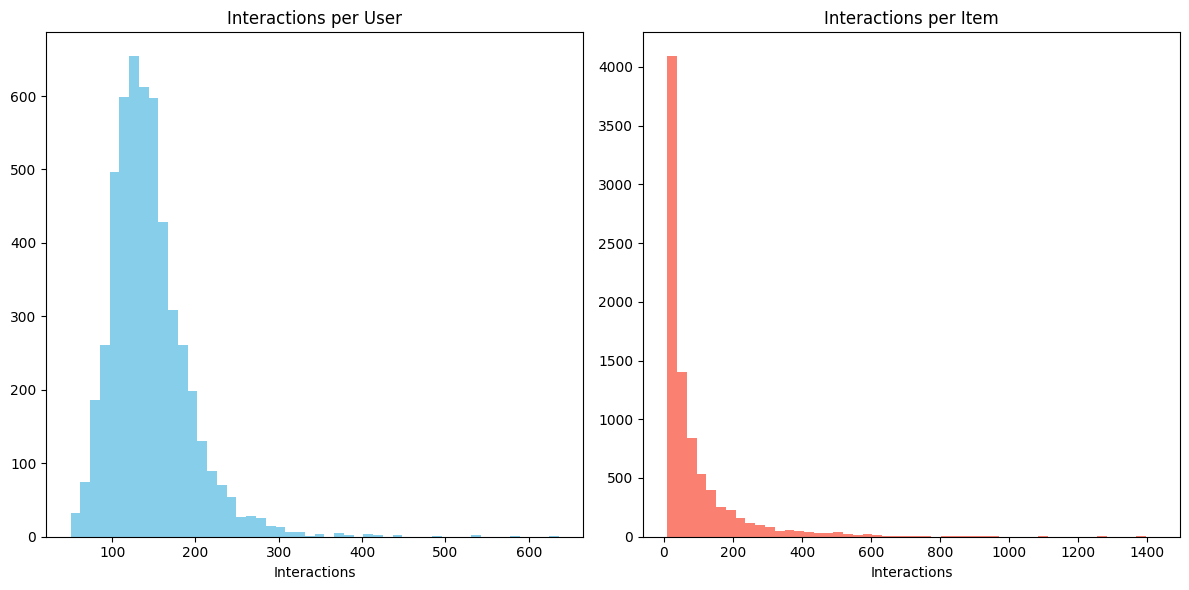

In [19]:
# plot the distribution of interactions per user and interactions per item
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(interactions_per_user.values, bins=50, color="skyblue")
plt.title("Interactions per User")
plt.xlabel("Interactions")

plt.subplot(1, 2, 2)
plt.hist(interactions_per_item.values, bins=50, color="salmon")
plt.title("Interactions per Item")
plt.xlabel("Interactions")

plt.tight_layout()
plt.show()

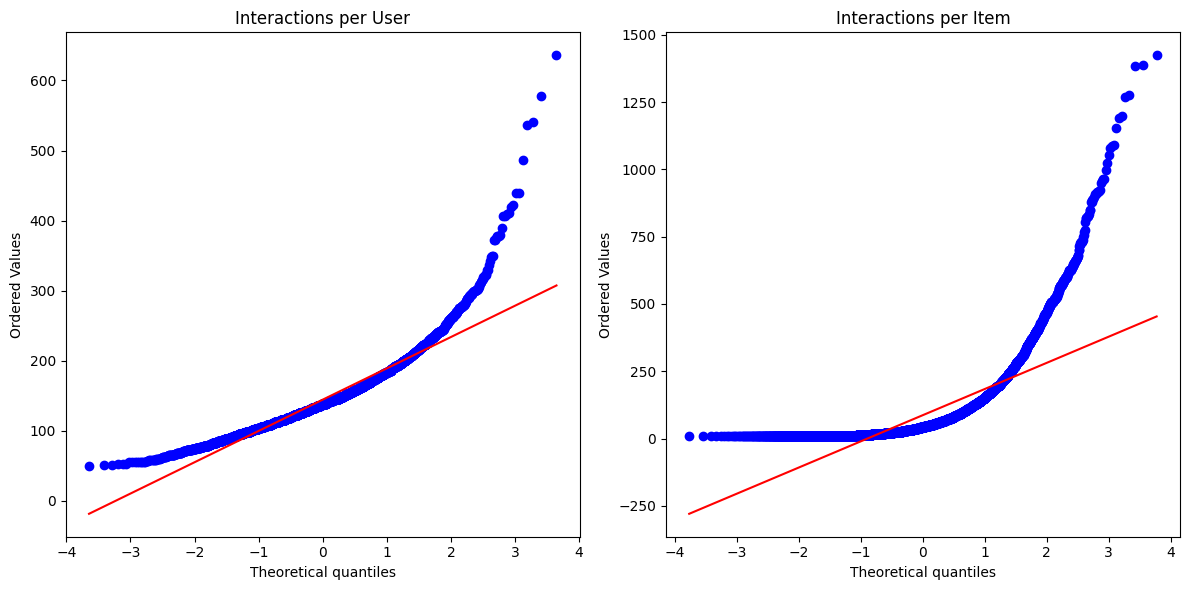

In [22]:
# qq plot to check if the distribution is normal
import scipy.stats as stats

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(interactions_per_user.values, dist="norm", plot=plt)
plt.title("Interactions per User")

plt.subplot(1, 2, 2)
stats.probplot(interactions_per_item.values, dist="norm", plot=plt)
plt.title("Interactions per Item")

plt.tight_layout()
plt.show()

In [23]:
# print percentiles of interactions per user and interactions per item
print("Interactions per User")
print(interactions_per_user.describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99]))
print("\nInteractions per Item")
print(interactions_per_item.describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99]))

Interactions per User
count    5199.000000
mean      144.552991
std        47.119140
min        50.000000
50%       138.000000
75%       166.000000
90%       200.000000
95%       227.000000
99%       295.020000
max       636.000000
Name: interaction, dtype: float64

Interactions per Item
count    8640.000000
mean       86.982755
std       123.884460
min        10.000000
50%        43.000000
75%       103.000000
90%       211.000000
95%       322.050000
99%       602.000000
max      1424.000000
Name: interaction, dtype: float64


In [25]:
# check for outliers with interquartile range
Q1 = interactions_per_user.quantile(0.25)
Q3 = interactions_per_user.quantile(0.75)
IQR = Q3 - Q1
print(f"Interactions per User - Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")


Interactions per User - Q1: 114.0, Q3: 166.0, IQR: 52.0


In [29]:
# check for tail user count (users with less than 52 interactions)
tail_users = interactions_per_user[interactions_per_user < 52].count()

In [32]:
# percentage of tail users
tail_users_percentage = (tail_users / interactions_per_user.shape[0]) * 100
print(f"Tail Users: {tail_users}, Percentage: {tail_users_percentage:.2f}%")

Tail Users: 3, Percentage: 0.06%
